## Import Package

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import mutual_info_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns


## Baca Data dan Data Cleaned

In [2]:
df = pd.read_csv('android_traffic.csv', sep=';')

df_copy = df.copy()

df_cleaned = df_copy.drop(columns=['duracion', 'avg_local_pkt_rate', 'avg_remote_pkt_rate'], axis=1)


X = df_cleaned.iloc[:, :-1]
y = df_cleaned.iloc[:, -1] 


## Menampilkan Kolom Data Cleaned

In [3]:
print(df_cleaned.columns)


Index(['name', 'tcp_packets', 'dist_port_tcp', 'external_ips', 'vulume_bytes',
       'udp_packets', 'tcp_urg_packet', 'source_app_packets',
       'remote_app_packets', 'source_app_bytes', 'remote_app_bytes',
       'source_app_packets.1', 'dns_query_times', 'type'],
      dtype='object')


## Feature Selection, Encoding, dan Split Data

In [9]:
selected_features = ['tcp_packets', 'dist_port_tcp', 'external_ips', 'vulume_bytes',
       'udp_packets', 'tcp_urg_packet', 'source_app_packets',
       'remote_app_packets', 'source_app_bytes', 'remote_app_bytes',
       'source_app_packets.1', 'dns_query_times']

X = df_cleaned[selected_features]
y = df_cleaned['type']

# Encode variabel y
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data X dan y
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=0)

# Menghitung informasi gain rasio
info_gain_ratio = mutual_info_classif(X_train, y_train)

feature_names_out = X.columns
feature_info_gain = pd.DataFrame({'Feature': feature_names_out, 'Information Gain Ratio': info_gain_ratio})
feature_info_gain = feature_info_gain.sort_values(by='Information Gain Ratio', ascending=False)

print(feature_info_gain)

# Gunakan 2 fitur teratas dari informasi gain
top_features = feature_info_gain.head(2)['Feature'].str.replace('_0', '').str.replace('_1', '').tolist()
X_train = X_train[top_features]
X_test = X_test[top_features]


                 Feature  Information Gain Ratio
8       source_app_bytes                0.259401
9       remote_app_bytes                0.228223
3           vulume_bytes                0.201329
7     remote_app_packets                0.149851
0            tcp_packets                0.146343
6     source_app_packets                0.118209
10  source_app_packets.1                0.110985
2           external_ips                0.082352
1          dist_port_tcp                0.066122
11       dns_query_times                0.016838
5         tcp_urg_packet                0.007255
4            udp_packets                0.000000


## Hitung k

In [12]:
len (y_test)

1569

In [14]:
import math

print(math.sqrt(len(y_test)))

39.61060464067672


## Classifier KNN

In [10]:
classifier = KNeighborsClassifier(n_neighbors = 39) 

classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=39)

## Metrik Evaluasi

In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Confusion Matrix:
 [[787 136]
 [176 470]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       923
           1       0.78      0.73      0.75       646

    accuracy                           0.80      1569
   macro avg       0.80      0.79      0.79      1569
weighted avg       0.80      0.80      0.80      1569



## Visualisasi Metrik Evaluasi

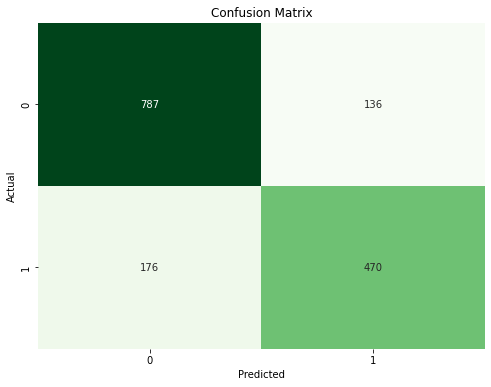

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## ROC Curve

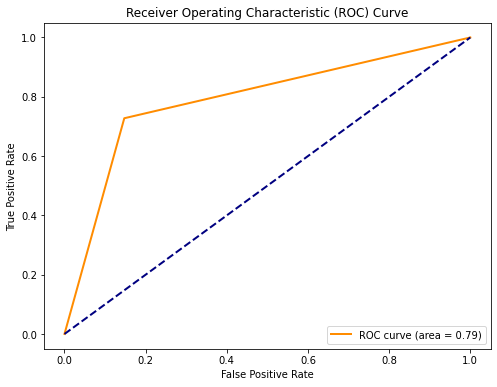

In [20]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
